# Week 9-1: Unsupervised Machine Learning

PR9-1: Great Outdoors wil graag weten in welke segmenten verkoopafdelingen (‘sales_branches’) opgedeeld kan worden. Er bestaan al retailersegmenten (table ‘retailer_segment’), Great Outdoors wil dus óók segmenten creëren voor verkoopafdelingen.

* Pas waar nodig Dummy Encoding toe.
* Train het initiële clustermodel.
* Experimenteer met meerdere k’s door het berekenen van de inter- en intraclusterafstand.
* Gebruik dit <u>script</u> dat <u>deze dataset</u> inleest als inspiratie

## Bibliotheken importeren

Hier importeren we de libraries die we gaan gebruiken voor deze opdracht.

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings as warn
import sqlite3 as sql
import numpy as np
warn.simplefilter("ignore")

## Data inlezen en kolommen selecteren

Hier pakken we de gegevens die we nodig hebben voor deze opdracht en lezen we de bestanden in.

In [21]:
# go_crm_conn = sql.connect("Great_Outdoors_Data_SQLite/go_crm.sqlite")
go_sales_conn = sql.connect("Great_Outdoors_Data_SQLite/go_sales.sqlite")
# go_staff_conn = sql.connect("Great_Outdoors_Data_SQLite/go_staff.sqlite")

# order_header = pd.read_sql("SELECT * FROM order_header", go_sales_conn)
# order_details = pd.read_sql("SELECT * FROM order_details", go_sales_conn)
# product = pd.read_sql("SELECT * FROM product", go_sales_conn)
# product_type = pd.read_sql("SELECT * FROM product_type", go_sales_conn)
# product_line = pd.read_sql("SELECT * FROM product_line", go_sales_conn)
sales_branch = pd.read_sql("SELECT * FROM sales_branch", go_sales_conn)
# country = pd.read_sql("SELECT * FROM country", go_sales_conn)

# data = pd.merge(order_header, order_details, on="ORDER_NUMBER")
# data = pd.merge(data, product, on="PRODUCT_NUMBER")
# data = pd.merge(data, product_type, on="PRODUCT_TYPE_CODE")
# data = pd.merge(data, product_line, on="PRODUCT_LINE_CODE")
# data = pd.merge(data, sales_branch, on="SALES_BRANCH_CODE")
# data = pd.merge(data, country, on="COUNTRY_CODE")

## Dropping unnecessary columns

We verwijderen de kolommen die we niet nodig hebben, nadat we sales_branch in data hebben gestopt.

In [22]:
data = sales_branch
data = data.drop(["ADDRESS1", "ADDRESS2", "POSTAL_ZONE"], axis=1)
data

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE,TRIAL888
0,13,Hamburg,None,2,T
1,14,München,None,2,T
2,15,Kista,None,10,T
3,17,Calgary,Alberta,4,T
4,18,Toronto,Ontario,4,T
5,19,Boston,Massachusetts,3,T
6,20,Seattle,Washington,3,T
7,21,Los Angeles,California,3,T
8,22,Miami,Florida,3,T
9,23,Lyon,None,1,T


## Lorem

ipsum

In [23]:
# data = data.drop_duplicates(["SALES_BRANCH_CODE"])
# data = data.loc[:, ["PRODUCT_LINE_CODE", "COUNTRY", "CITY", "SALES_BRANCH_CODE"]]
data

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE,TRIAL888
0,13,Hamburg,None,2,T
1,14,München,None,2,T
2,15,Kista,None,10,T
3,17,Calgary,Alberta,4,T
4,18,Toronto,Ontario,4,T
5,19,Boston,Massachusetts,3,T
6,20,Seattle,Washington,3,T
7,21,Los Angeles,California,3,T
8,22,Miami,Florida,3,T
9,23,Lyon,None,1,T


## One-hot encoding van onafhankelijke niet-numerieke variabelen

Hier maken we dummies van onafhankelijke niet-numerieke variabelen en tonen dit weer op het scherm. We gebruiken one-hot encoding hiervoor.

In [24]:
dummies = pd.get_dummies(data.loc[:,["CITY", "REGION"]])
dummies

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,...,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Concat the dummies with the actual data

We voegen de dummies met de data samen tot een volledig geheel.

In [25]:
df = pd.concat([data, dummies], axis = 1)
# df.drop(["COUNTRY", "CITY"], axis=1, inplace=True)
df

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE,TRIAL888,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,...,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,13,Hamburg,None,2,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,14,München,None,2,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,15,Kista,None,10,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,17,Calgary,Alberta,4,T,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,18,Toronto,Ontario,4,T,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,19,Boston,Massachusetts,3,T,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,20,Seattle,Washington,3,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,21,Los Angeles,California,3,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,22,Miami,Florida,3,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,23,Lyon,None,1,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Clusteringmodel bouwen met 2 dimensies

Hier gaan we een clusteringmodel maken met 2 dimensies.

In [26]:
df_2d = dummies.loc[:, :]
# df_2d = pd.get_dummies(df_2d, columns=[])
df_2d

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,...,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Making clusters to find the right K

We passen het aantal clusters aan om de juiste K waarde te kunnen vinden en het clusteringmodel te kunnen trainen.

In [27]:
# TODO: parameters aanpassen om het beste resultaat te vinden
kmeans = KMeans(n_clusters = 2, random_state = 42)      # Aanpassing van het aantal clusters maakt een verschil, maar krijg ik niet beter dan het nu is
kmeans.fit_predict(df_2d)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

## Convert kmeans to DataFrame

We zetten de kmeans naar een DataFrame om en tonen dit op het scherm.

In [28]:
kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
kmeans_centra

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.037037,0.037037,0.037037,0.037037,0.037037,1.387779e-17,0.037037,0.037037,0.037037,0.037037,...,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037


## Rename all the columns

Hier hernoemen we alle kolommen die we gebruiken voor het cluster.

In [29]:
for i in range(len(kmeans_centra.columns)):
    kmeans_centra = kmeans_centra.rename(columns = {i : f'{df_2d.columns[i]}'})
    
kmeans_centra

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,...,REGION_Noord-Holland,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.037037,0.037037,0.037037,0.037037,0.037037,1.387779e-17,0.037037,0.037037,0.037037,0.037037,...,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037,0.037037


## Calculate Euclidian distance

We berekenen hier de euclidische afstand, waardoor we weten wat het verschil is tussen de interclusterafstand en de intraclusterafstand.

In [30]:
for src_index, _ in df_2d.iterrows():
    euclidian_distances = dict()
    print(f"Afstand van bronindex {src_index} tot...")

    for centrumindex, _ in kmeans_centra.iterrows():
        print(f"\tCentrumindex {centrumindex}:")
        euclidian_sum = 0

        for column_name in kmeans_centra.columns:
            current_difference = df_2d.at[src_index, column_name] - kmeans_centra.at[centrumindex, column_name]
            print(f'\t\t{df_2d.at[src_index, column_name]} - {kmeans_centra.at[centrumindex, column_name]} = {current_difference}')
            euclidian_sum += current_difference ** 2
        
        print(f'\tTotale euclidische som: {euclidian_sum}')
        euclidian_distance = math.sqrt(euclidian_sum)
        print(f'\tEuclidische afstand: {euclidian_distance}')
        euclidian_distances[centrumindex] = euclidian_distance
        print('------------------------------------------------')
    
    print(euclidian_distances)
    centrum_number = min(euclidian_distances, key = euclidian_distances.get)
    print(centrum_number)
    df_2d.at[src_index, 'Centrum'] = centrum_number
    print("================================================")

df_2d

Afstand van bronindex 0 tot...
	Centrumindex 0:
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 1.0 = -1.0
		True - 0.0 = 1.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 1.0 = -1.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
		False - 0.0 = 0.0
	Totale euclidische som: 3.0
	Euclidische afstand: 1.7320508075688772
---------------------

,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,CITY_Distrito Federal,CITY_Hamburg,CITY_Heverlee,CITY_Kista,CITY_Kuopio,...,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands,Centrum
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1.0
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1.0
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1.0
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1.0


## Plot to show

Hier tonen we een plot.

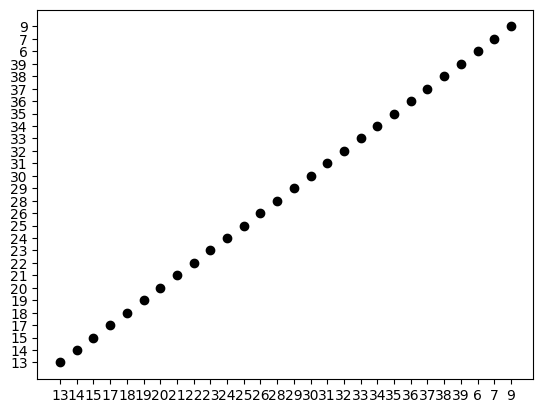

In [36]:
plt.scatter(data["SALES_BRANCH_CODE"], data["SALES_BRANCH_CODE"], color = "k")
plt.show()

## Check the center

We checken het centrum, groeperen deze en tellen deze op.

In [ ]:
df_2d.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,1
1,27


## Clusteringmodel bouwen met meer dan 2 dimensies (alle kolommen uit de dataset)

We maken het clusteringsmodel met meer dan 2 dimensies waar we alle kolommen uit de dataset gebruiken.

### Centra berekenen

Hier berekenen we het centrum en maken we een vergelijking.

In [ ]:
# TODO: finetunen van het aantal clusters
kmeans = KMeans(n_clusters = 2, random_state = 42)      # Aantal clusters lijkt geen verschil te maken... Seed ook niet...
prediction_results = kmeans.fit_predict(df_2d)
prediction_results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

### Take the center

We gooien de voorspellingen in het centrum en tonen dit op het scherm.

In [ ]:
df['Centrum'] = prediction_results
df

,SALES_BRANCH_CODE,CITY,REGION,COUNTRY_CODE,TRIAL888,CITY_Amsterdam,CITY_Bilbao,CITY_Birmingham,CITY_Boston,CITY_Calgary,...,REGION_Ontario,REGION_Osaka,REGION_SP,REGION_Taipei,REGION_Tokyo,REGION_VIC,REGION_Vizcaya,REGION_Washington,REGION_West Midlands,Centrum
0,13,Hamburg,None,2,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,14,München,None,2,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,15,Kista,None,10,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,17,Calgary,Alberta,4,T,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,1
4,18,Toronto,Ontario,4,T,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,1
5,19,Boston,Massachusetts,3,T,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
6,20,Seattle,Washington,3,T,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,1
7,21,Los Angeles,California,3,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
8,22,Miami,Florida,3,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
9,23,Lyon,None,1,T,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


### De juiste centra toewijzen aan rijen uit de dataset

Wederom pakken we het centrum, groeperen deze en tellen vervolgens hoeveel connecties het heeft.

In [ ]:
df.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,1
1,27


## Evalueren

We evalueren en berekenen de interclusterafstand/intraclusterafstand.

In [ ]:
intercluster_distance = 0
intracluster_distance = 0

common_columns = df_2d.columns.intersection(kmeans_centra.columns)

for centrumindex, _ in kmeans_centra[common_columns].iterrows():
    for src_index, _ in df_2d[common_columns].iterrows():
        if df_2d.at[src_index, 'Centrum'] == centrumindex:
            diff = df_2d.loc[src_index, common_columns] - kmeans_centra.loc[centrumindex, common_columns]
            distance = np.linalg.norm(diff[pd.to_numeric(diff, errors='coerce').notnull()])
            intracluster_distance += distance
        else:
            diff = df_2d.loc[src_index, common_columns] - kmeans_centra.loc[centrumindex, common_columns]
            distance = np.linalg.norm(diff[pd.to_numeric(diff, errors='coerce').notnull()])
            intercluster_distance += distance

print(f"Intercluster distance (more is better): {intercluster_distance}")
print(f"Intracluster distance (less is better): {intracluster_distance}")

Intercluster distance (more is better): 51.95062054895879
Intracluster distance (less is better): 32.22229132362789
